In [2]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import joblib
import os
import seaborn as sns 
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
import matplotlib.pyplot as plt
import numpy as np

In [8]:
meta_data = pd.read_csv('combined_competency.csv', sep=',')
x = meta_data.drop(columns=['isolate', 'Competence'])
y = meta_data['Competence']

# Splitting the data into training and test data 
train_x, test_x, train_y, test_y = train_test_split (x, y, test_size=0.2, random_state=42)   
 
i=RandomForestClassifier()
cross_val_score(i, x, y, cv=10).mean()

i.fit(train_x, train_y)
joblib.dump(i, 'ml.pkl')
y_pred = i.predict(test_x)

print("\nAccuracy Score:")
print(accuracy_score(test_y, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(test_y, y_pred))
print("\nClassification Report:")
print(classification_report(test_y, y_pred))


Accuracy Score:
1.0

Confusion Matrix:
[[8 0]
 [0 9]]

Classification Report:
              precision    recall  f1-score   support

 Monomorphic       1.00      1.00      1.00         8
 Pleomorphic       1.00      1.00      1.00         9

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



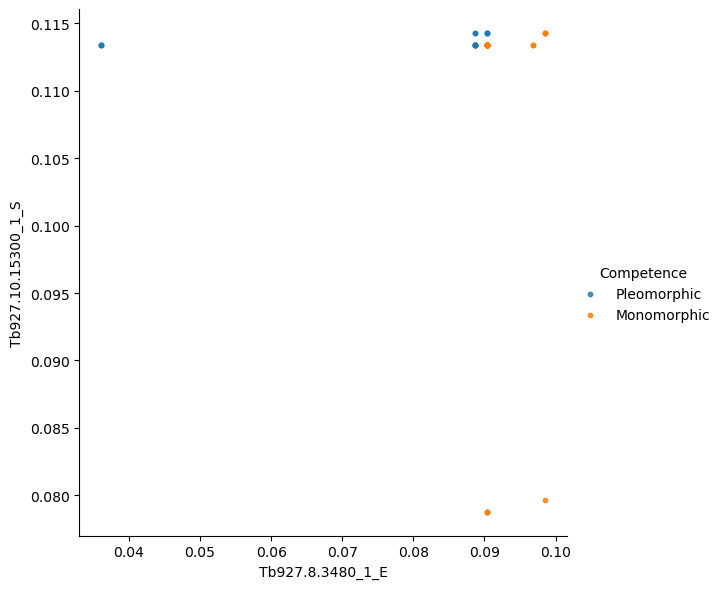

In [4]:
sns.lmplot(data=meta_data, x='Tb927.8.3480_1_E', y='Tb927.10.15300_1_S', scatter_kws={"s": 10}, height=6, hue='Competence', fit_reg=False)
plt.show()

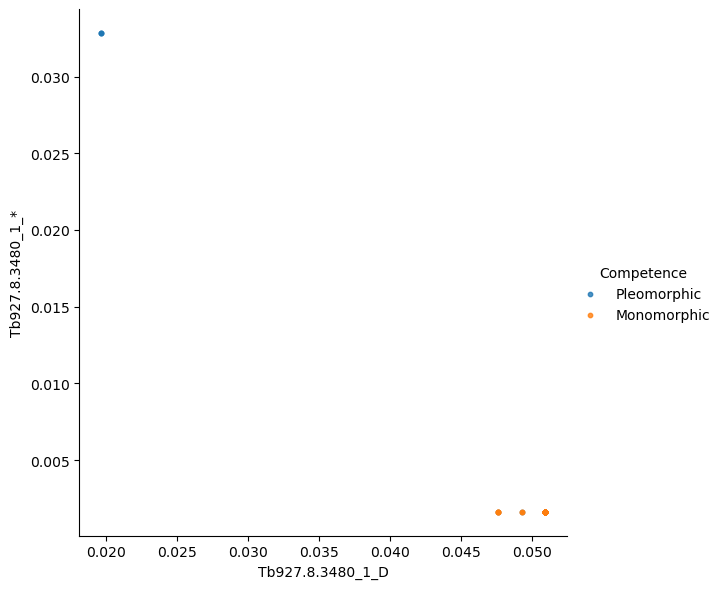

In [35]:
sns.lmplot(data=meta_data, x='Tb927.8.3480_1_D', y='Tb927.8.3480_1_*', scatter_kws={"s": 10}, height=6, hue='Competence', fit_reg=False)
plt.show()

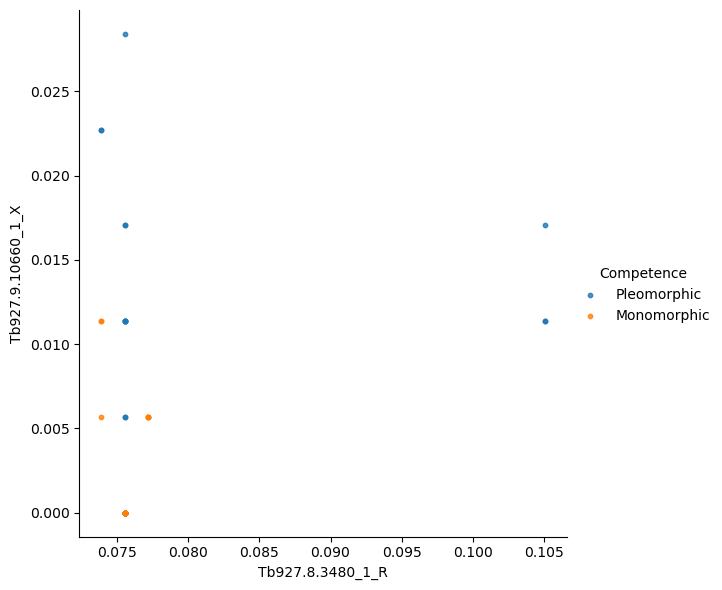

In [37]:
sns.lmplot(data=meta_data, x='Tb927.8.3480_1_R', y='Tb927.9.10660_1_X', scatter_kws={"s": 10}, height=6, hue='Competence', fit_reg=False)
plt.show()

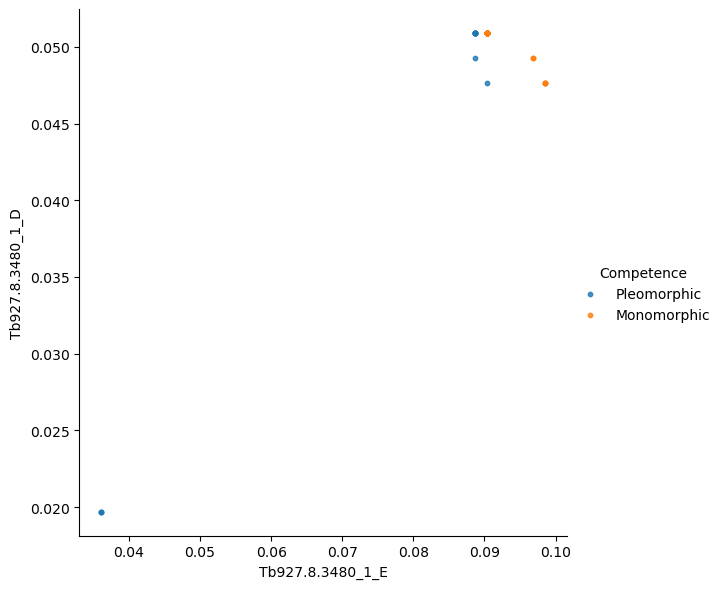

In [48]:
sns.lmplot(data=meta_data, x='Tb927.8.3480_1_E', y='Tb927.8.3480_1_D', scatter_kws={"s": 10}, height=6, hue='Competence', fit_reg=False)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/bas

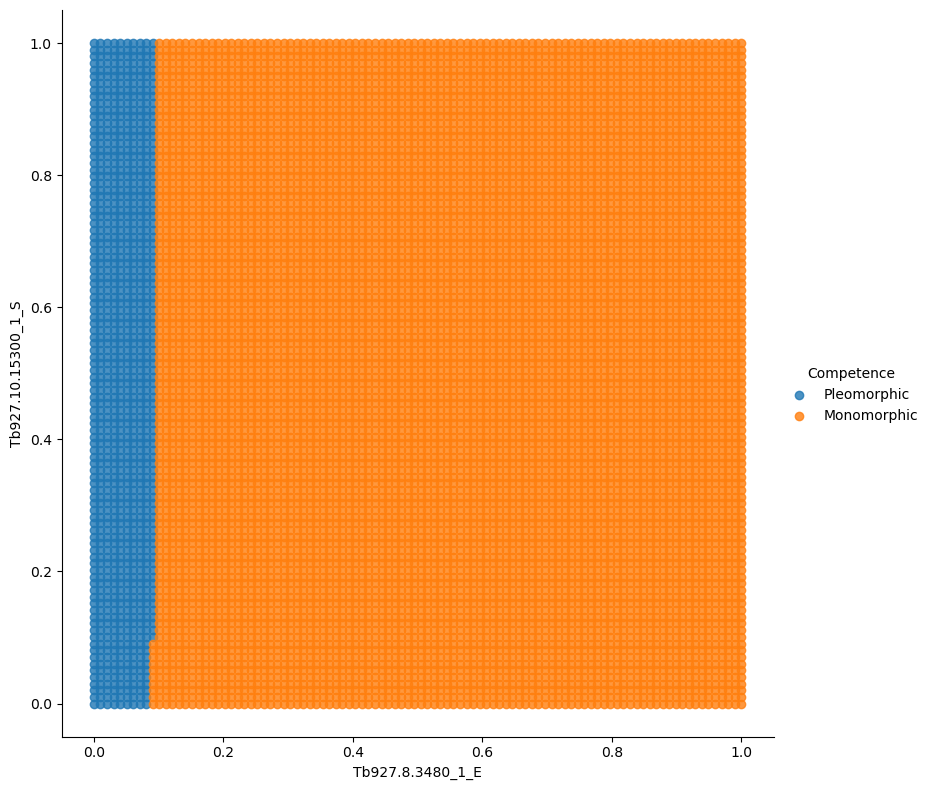

In [45]:
# Train using only two selected features
selected_features = ['Tb927.8.3480_1_E', 'Tb927.10.15300_1_S']
train_x_selected = train_x[selected_features]  
r = RandomForestClassifier(1)
r.fit(train_x_selected, train_y)

# Generate mesh grid
rows = []
for gene_x in np.linspace(0, 1, 100):
    for gene_y in np.linspace(0, 1, 100):
        rows.append({
            'Tb927.8.3480_1_E': gene_x, 
            'Tb927.10.15300_1_S': gene_y, 
            'Competence': r.predict([[gene_x, gene_y]])[0]  
        })

mesh = pd.DataFrame(rows, columns=['Tb927.8.3480_1_E', 'Tb927.10.15300_1_S', 'Competence'])

sns.lmplot(data=mesh, x='Tb927.8.3480_1_E', y='Tb927.10.15300_1_S', hue='Competence', fit_reg=False, height=8)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/bas

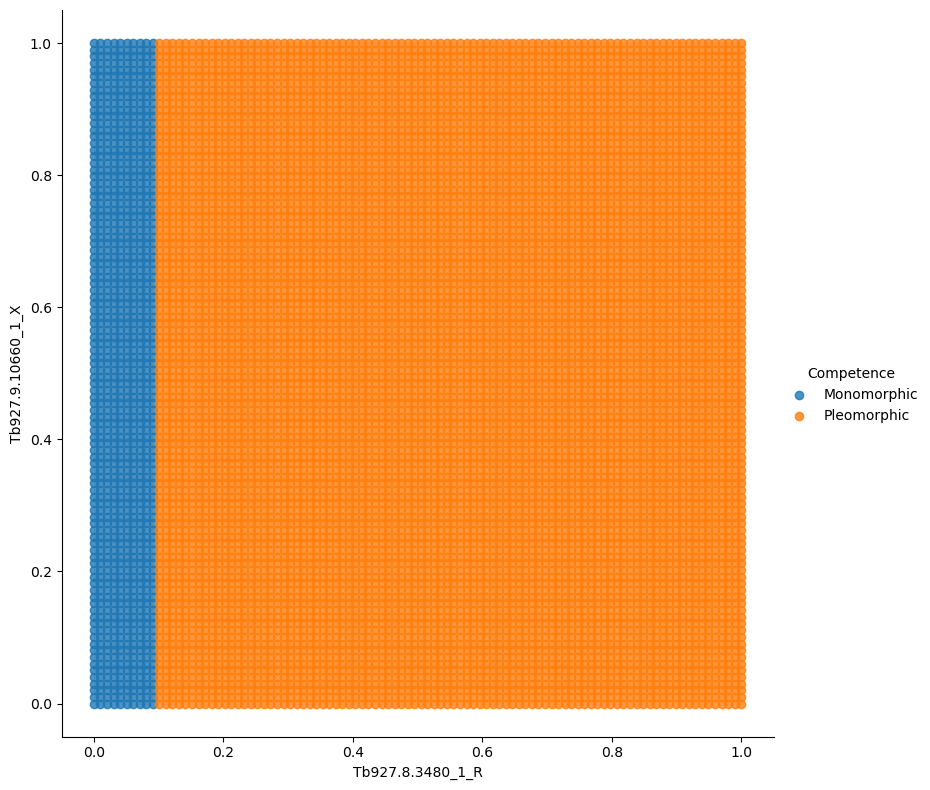

In [57]:
# Train using only two selected features
selected_features = ['Tb927.8.3480_1_R', 'Tb927.9.10660_1_X']
train_x_selected = train_x[selected_features]  
r = RandomForestClassifier(1)
r.fit(train_x_selected, train_y)

# Generate mesh grid
rows = []
for gene_x in np.linspace(0, 1, 100):
    for gene_y in np.linspace(0, 1, 100):
        rows.append({
            'Tb927.8.3480_1_R': gene_x, 
            'Tb927.9.10660_1_X': gene_y, 
            'Competence': r.predict([[gene_x, gene_y]])[0]  
        })

mesh = pd.DataFrame(rows, columns=['Tb927.8.3480_1_R', 'Tb927.9.10660_1_X', 'Competence'])

sns.lmplot(data=mesh, x='Tb927.8.3480_1_R', y='Tb927.9.10660_1_X', hue='Competence', fit_reg=False, height=8)
plt.show()

In [26]:
from sklearn import tree
w=tree.DecisionTreeClassifier()
cross_val_score(w, x, y, cv=10).mean()

0.976388888888889

In [27]:
for k in range(1, 30, 2):
    s=neighbors.KNeighborsClassifier(k)
    print(k, cross_val_score(s, x, y, cv=10).mean())

1 0.9875
3 0.975
5 0.9625
7 0.9625
9 0.9013888888888889
11 0.9013888888888889
13 0.8777777777777779
15 0.8777777777777779
17 0.8777777777777779
19 0.8777777777777779
21 0.8777777777777779
23 0.8777777777777779
25 0.8541666666666666
27 0.8541666666666666
29 0.8541666666666666
